# Task 4.1 Supervised Learning - Regression

### Datensatz laden und prüfen

In [7]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [29]:
# Datensatz einlesen
heart = pd.read_csv('heartdata.csv', index_col=0)

# Erste Einblicke in die Daten
print(heart.head())
print(heart.info())
print(heart.describe())
heart

      biking    smoking  heartdisease
1  30.801246  10.896608     11.769423
2  65.129215   2.219563      2.854081
3   1.959665  17.588331     17.177803
4  44.800196   2.802559      6.816647
5  69.428454  15.974505      4.062224
<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 1 to 498
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   biking        498 non-null    float64
 1   smoking       498 non-null    float64
 2   heartdisease  498 non-null    float64
dtypes: float64(3)
memory usage: 15.6 KB
None
           biking     smoking  heartdisease
count  498.000000  498.000000    498.000000
mean    37.788411   15.435034     10.174538
std     21.481519    8.289959      4.571874
min      1.119154    0.525850      0.551898
25%     20.204598    8.279776      6.513683
50%     35.824459   15.814614     10.385255
75%     57.852786   22.568925     13.724024
max     74.907111   29.946743     20.453496


,biking,smoking,heartdisease
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224
...,...,...,...
494,47.660440,27.562464,11.294392
495,45.097203,21.385620,9.616762
496,8.279743,6.423720,13.495168
497,42.345863,20.741328,10.115865


In [30]:
# check for NaNs
heart.isna().sum().sum() 

np.int64(0)

### Annahmen der linearen Regression

In [9]:
# Korrelation zwischen den Variablen
print("\nKorrelationsmatrix:")
print(heart.corr())


Korrelationsmatrix:
                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000


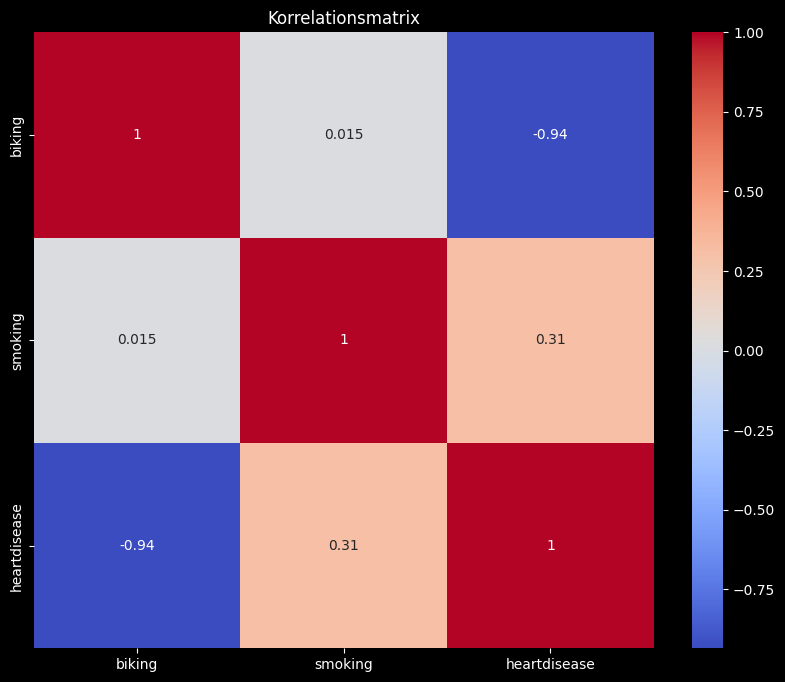

In [ ]:
# Korrelation mit heatmap visualisieren
plt.figure(figsize=(10, 8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()

In [12]:
# Pearson-Korrelation für zwei Variablen
pearson_corr, p_value = stats.pearsonr(heart['smoking'], heart['heartdisease'])
print(f"\nPearson-Korrelation zwischen Rauchen und Herzkrankheiten: {pearson_corr:.2f} (p-Wert: {p_value:.3f})")



Pearson-Korrelation zwischen Rauchen und Herzkrankheiten: 0.31 (p-Wert: 0.000)


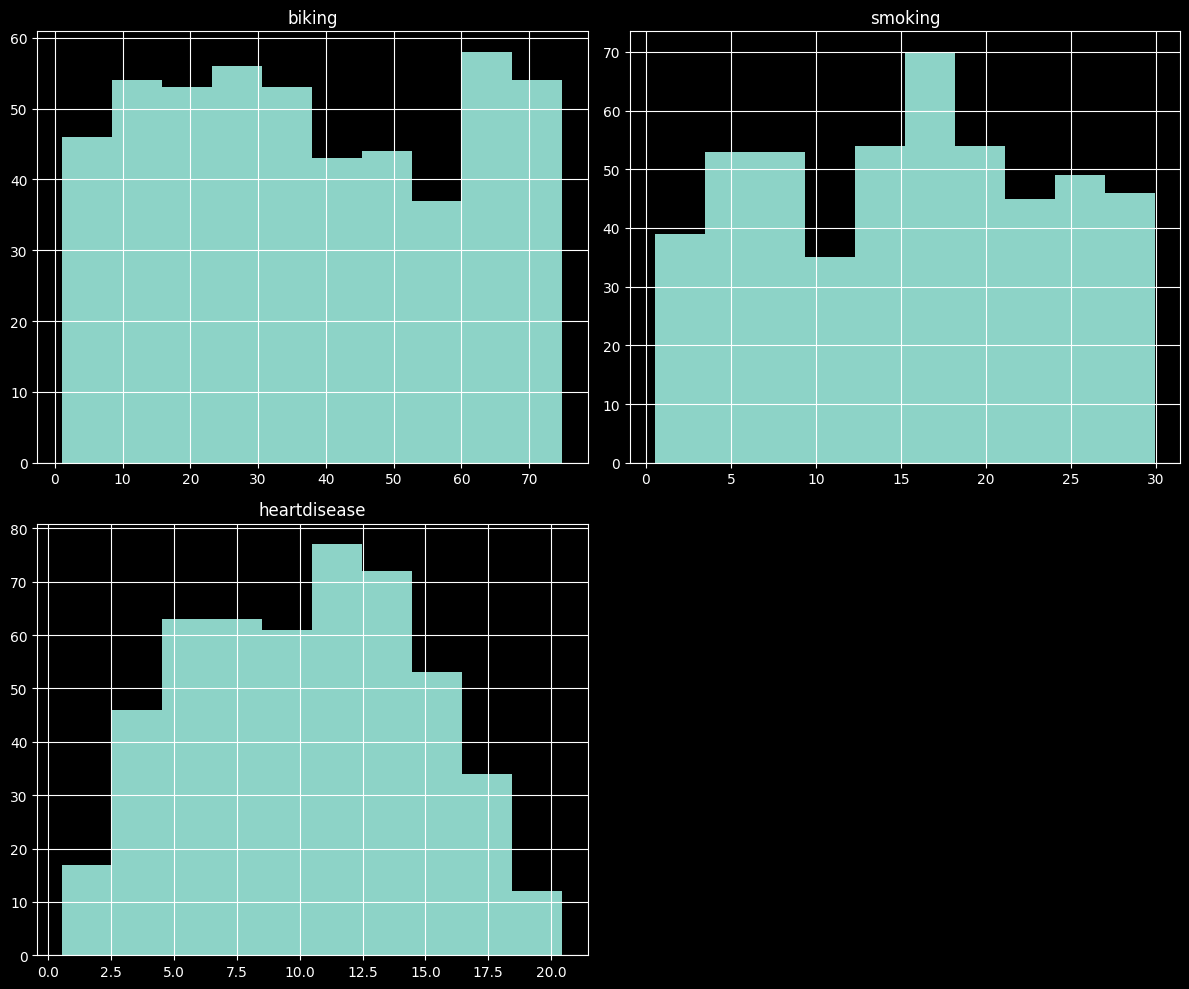

In [15]:
# Histogramme für Verteilung der Variablen
heart.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

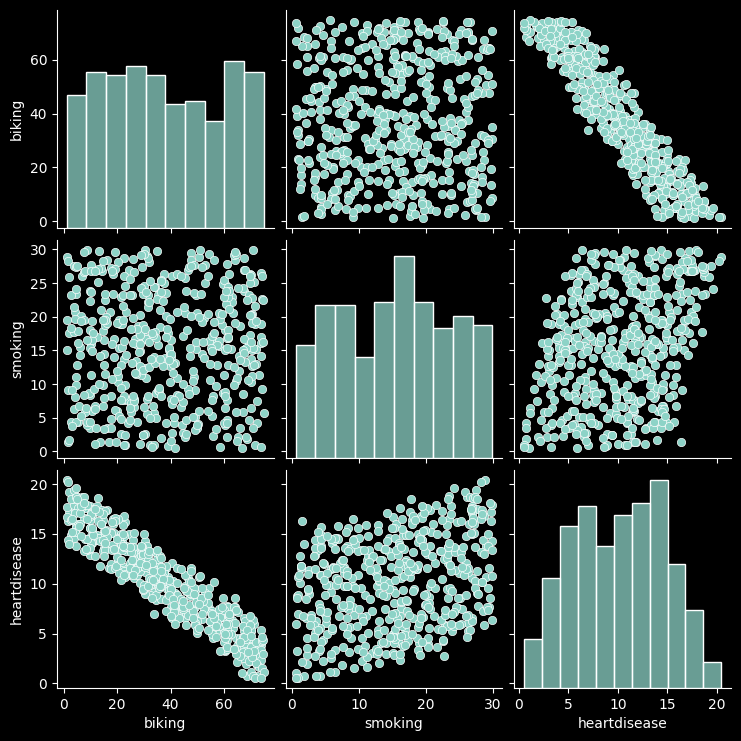

In [16]:
# Beziehungen zwischen Variablen visualisieren
sns.pairplot(heart)
plt.show()

### Lineares Regressionsmodell erstellen

In [19]:
# Zielvariable (y) und Merkmale (X) definieren
X = heart[['biking', 'smoking']]
y = heart['heartdisease']

# Modell initialisieren
model = LinearRegression()

# Modell anpassen
model.fit(X, y)

LinearRegression()

### Modell auswerten

In [20]:
# Koeffizienten und Intercept anzeigen
print("\nKoeffizienten:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)


Koeffizienten:
[-0.20013305  0.17833391]
Intercept:
14.984657987225848


In [21]:
# Vorhersagen erstellen
y_pred = model.predict(X)

In [22]:
# R^2 Score (Bestimmtheitsmaß) ausgeben
r2 = r2_score(y, y_pred)
print(f"\nR^2-Score: {r2:.2f}")


R^2-Score: 0.98


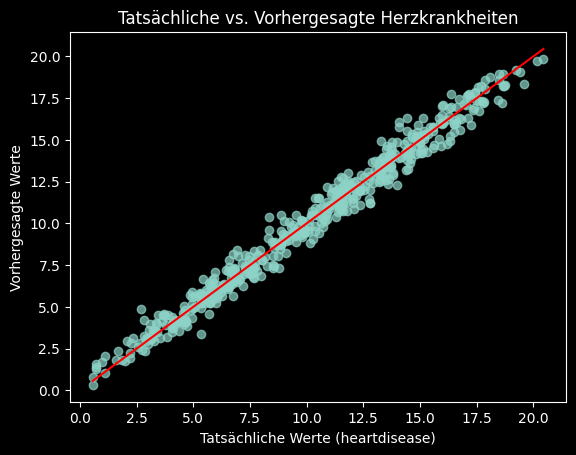

In [23]:
# Vorhersagen visualisieren
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel('Tatsächliche Werte (heartdisease)')  # x-Achse: Wirkliche Beobachtungen
plt.ylabel('Vorhergesagte Werte')                # y-Achse: Vorhersagen vom Modell
plt.title('Tatsächliche vs. Vorhergesagte Herzkrankheiten')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

### Modelltraining mit Cross-Validation

In [25]:
# Daten aufteilen in Training und Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neues Modell trainieren
model_cv = LinearRegression()
model_cv.fit(X_train, y_train)

# Auf Testdaten vorhersagen
y_test_pred = model_cv.predict(X_test)

# R^2 auf Testdaten berechnen
r2_test = r2_score(y_test, y_test_pred)
print(f"\nR^2-Score auf Testdaten: {r2_test:.2f}")


R^2-Score auf Testdaten: 0.98


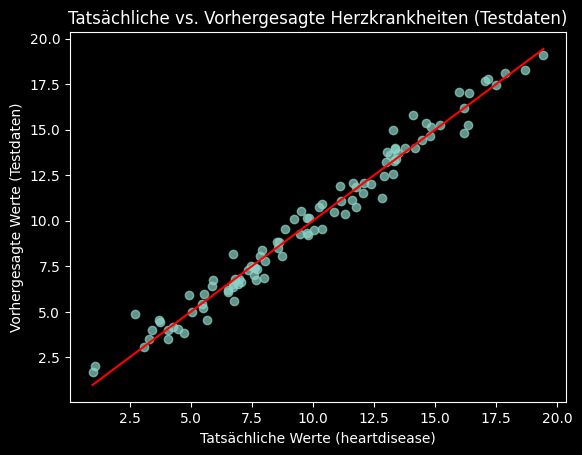

In [26]:
# Testdaten-Vorhersagen visualisieren
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Tatsächliche Werte (heartdisease)')
plt.ylabel('Vorhergesagte Werte (Testdaten)')
plt.title('Tatsächliche vs. Vorhergesagte Herzkrankheiten (Testdaten)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()